In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from scipy import special

# Lecture 22

## Students Flipping Fair Coins Conclude Coin is Unfair!

Suppose there are 2000 CS Majors and each student:
* is given a fair coin by the instructor but _they are not told that it is a fair coin_
* **collects data** by flipping the coin **160 times** and counts the number of times it lands Heads
* runs a **hypothesis test**:
    * **Null Hypothesis:** They were given a fair coin and the number of heads observed see is due to chance.
    * **Alternative Hypothesis:** The coin is biased and so the number of heads they observed is not due to chance alone.
    * **Test Statistic:** abs(num_heads - 80)
* Uses the null probability distribution to report their *p-value* and rejects the null hypothesis **if their p-value is less than 0.05**

We know that **we gave all of them fair coins**.  How often will they **incorrectly reject the null hypothesis?**

### We can calculate the theoretical (exact) probability distribution, since this is a binomial distribution:

Text(0, 0.5, 'Percent per unit')

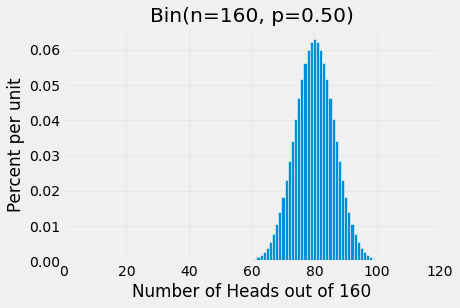

In [2]:
n=160
k = np.arange(n+1)
#Probability for a binomial distribution with p=0.50
p = special.comb(n, k)*(0.50**k)*(0.50**(n-k))

fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(0,int(n*3/4))
plt.title("Bin(n="+str(n)+", p=0.50)");
plt.xlabel("Number of Heads out of "+str(n))
plt.ylabel("Percent per unit")




### For this example, we're going to use the test statistic |Num heads -80|.   For example, the probability that |Num heads - 80| = 1 is the sum of P(Num heads = 81) + Prob (num heads = 79).    Notice that using this we can plot the exact probability distribution for this test statistic as well. 

In [3]:
#Plot exact theoretical distribution of |Number of heads - n/2\:

#Create an empty array of size n/2
abs_theoretical_dist=np.zeros(int(n/2+1))

#The probability |Num heads - 50| = 0 is just P(Heads=50)
abs_theoretical_dist[0]=p[int(n/2)]

s = np.arange(start=1, stop=int(n/2+1), step=1)

#The probability |Num heads - 50| = k is Prob(Heads = 50+k) + Prob(Heads = 50-k)
for i in s:
    abs_theoretical_dist[i]=p[int(n/2-i)]+p[int(n/2+i)]


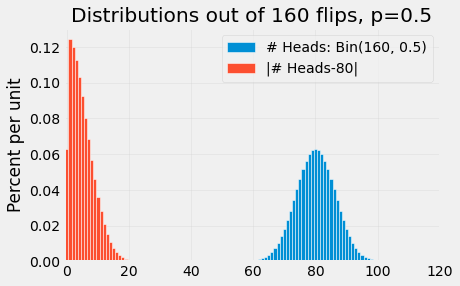

In [4]:
fig, ax = plt.subplots()

# Plot of number of heads
ax.bar(k, p, width=1, ec='white', label ="# Heads: Bin("+str(n)+", 0.5)");

# Plot of |heads - n/2|
ax.bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white', label ='|# Heads-'+ str(int(n/2))+'|');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(-1,int(n*3/4))
plt.title("Distributions out of "+str(n)+ " flips, p=0.5");
#plt.xlabel("|Heads-50|")
plt.ylabel("Percent per unit")



plt.legend()

Could you write code to simulate the process of one student running this hypothesis test? 

In [5]:
def simulate_one_student(num_flips, plot=False):
    
    
    #Conduct experiment (flip coin num_flips times)
    obs_flips = np.random.choice(["H", "T"], num_flips) 

    # Define the test statistic
    def test_statistic(flips_dataset):
        num_heads = sum(flips_dataset == "H")
        return np.abs(num_heads - num_flips/2)
    
    # Compute the observed value of the statistic on our actual data
    obs_statistic = test_statistic(obs_flips)
    
    p_value = sum(abs_theoretical_dist[np.arange(int(num_flips/2+1))>=obs_statistic])
    p_value_round=round(p_value,2)
    
    if plot==True:
    
        fig, ax = plt.subplots()

        ax.bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white');
        ax.set_axisbelow(True)
        ax.grid(alpha=0.25)
        plt.xlim(-1,int(num_flips/6))
        plt.title("Distribution of "+ str(num_flips)+ " tosses of fair coin")
        plt.xlabel("|# heads - "+ str(int(num_flips/2))+"|")
        plt.ylabel("Percent per unit")
        plt.scatter(obs_statistic, -0.002, color='red', s=70);
    
    #Color in the part of the histogram to the right of the observed statistic (i.e. the area that represents the p-value)
        
        ax.bar(np.arange(int(n/2+1))[np.arange(int(n/2+1))>=obs_statistic], abs_theoretical_dist[np.arange(int(n/2+1))>=obs_statistic], width=1, ec='white', label ='p-value ='+str(p_value_round),alpha=0.6);
        plt.legend()
    
   
    return p_value_round, int(obs_statistic)

(0.68999999999999995, 3)

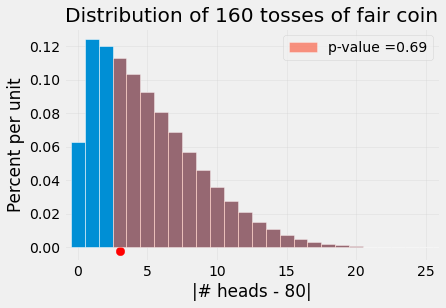

In [27]:
simulate_one_student(n, plot=True)

Text(0.5, 0, '|Heads-80|')

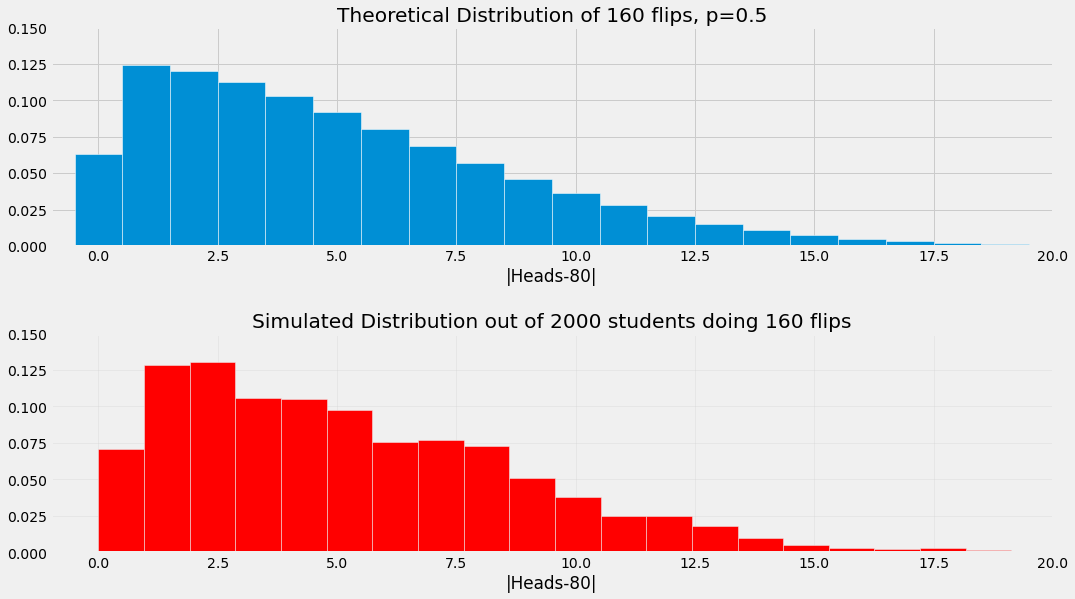

In [35]:
num_sim=2000

simulated_statistics = np.array([simulate_one_student(n) for i in range(num_sim)])

fig, ax = plt.subplots(2,1,figsize=(16,9))


plt.subplots_adjust(
                    wspace=0.4, 
                    hspace=0.4)

ax[0].bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white', label ='|# Heads-'+ str(int(n/2))+'|');
ax[0].set_xlim(-1,20)
ax[0].set_ylim(0, .15)
ax[0].set_title("Theoretical Distribution of "+str(n)+ " flips, p=0.5")
ax[0].set_xlabel("|Heads-"+str(int(n/2))+"|")


ax[1].hist(simulated_statistics[:,1],density=True,bins=23, color='r');
ax[1].set_axisbelow(True)
ax[1].grid(alpha=0.25)
ax[1].set_xlim(-1,20)
ax[1].set_ylim(0, .15)
ax[1].set_title("Simulated Distribution out of "+str(num_sim)+" students doing "+str(n)+ " flips")
ax[1].set_xlabel("|Heads-"+str(int(n/2))+"|")

## Law of Large Numbers

The empirical distribution looks more and more similar to the theoretical distribution emprical distribution under the null.  More is better!

# What is the smallest observed test statistic that results in a p-value <0.05?

In [29]:
# Guess and check below:
print(sum(abs_theoretical_dist[12:]))
print(sum(abs_theoretical_dist[13:]))

#need observed test statistic greater than or equal to ____ for p-value<0.05


0.0686822920412
0.0477669960283


In [34]:
def plot_crit_value(n, crit_value):
    p_value_crit=sum(abs_theoretical_dist[crit_value:])
    
    fig, ax = plt.subplots()

    # Plot of |heads - n/2|
    ax.bar(np.arange(int(n/2+1)), abs_theoretical_dist, width=1, ec='white', label ='|# Heads-'+ str(int(n/2))+'|');
    ax.set_axisbelow(True)
    ax.grid(alpha=0.25)
    plt.xlim(-1,int(n*1/6))
    #plt.title("Distribution out of "+str(n)+ " flips, p=0.5, Obs Test Stat = "+str(crit_value));
    plt.title("Distribution out of "+str(n)+ " flips, p=0.5");
    plt.xlabel("|Heads-"+str(int(n/2))+"|")
    plt.ylabel("Percent per unit")
    plt.scatter(crit_value, -0.002, color='red', s=70);    
    #Color in the part of the histogram to the right of the observed statistic (i.e. the area that represents the p-value)    
    ax.bar(np.arange(int(n/2+1))[np.arange(int(n/2+1))>=crit_value], abs_theoretical_dist[np.arange(int(n/2+1))>=crit_value], width=1, ec='white', label ='p-value ='+str(p_value_crit),alpha=0.6);
    #plt.legend()

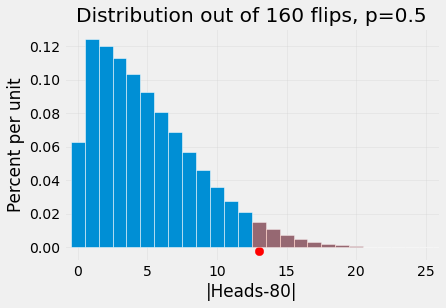

In [30]:
plot_crit_value(n, 13)

Number of students out of 2000  with p-value less than 0.05 =   82


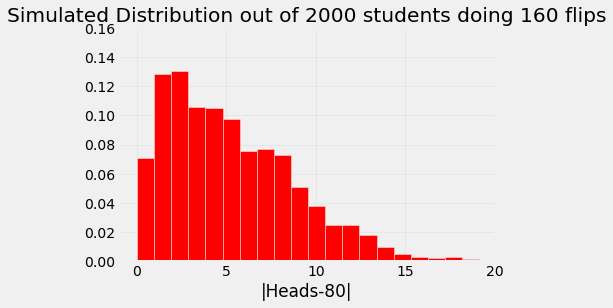

In [36]:
fig, ax = plt.subplots()

ax.hist(simulated_statistics[:,1],density=True,bins=23, color='r');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
ax.set_xlim(-1,20)
ax.set_ylim(0, .16)
ax.set_title("Simulated Distribution out of "+str(num_sim)+" students doing "+str(n)+ " flips")
ax.set_xlabel("|Heads-"+str(int(n/2))+"|")


#Empirical output:  How many out of the 2000 students had a significant p-value?
print("Number of students out of", str(num_sim)," with p-value less than 0.05 =  ", str(sum(simulated_statistics[:,1]>=13)))

## Notice: In our simulation above, approximately  5% of the 2000 students would incorrectly reject the null hypothesis and say their coin was biased, even when it wasn't

<br><br><br><br>

---

## Super Soda Co and the Case of Bad Taste

Manufacturers of Super Soda run a taste test and 91 out of 200 tasters prefer Super Soda over its rival.  The boss is upset!  He asks:

    Do fewer people prefer Super Soda, or is this just chance?
    
You run a hypothesis test:

* **Null Hypothesis:** Equal proportions of the population prefer Super Soda as Rival and any variability is due to chance.
* **Alternative Hypothesis:** Fewer people in the population prefer Super Soda than its Rival.
* **Test Statistic:** Number of people who prefer Super Soda


You pick a **p-value cutoff of 0.05**

In [ ]:
from datascience import *
#Use pip install datascience

<br><br><br><br><br>

---

## The Importance of Sample Size

Larger samples give us more information about the population and also allow us to test more subtle differences.  

In [12]:
def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['H', 'T'], sample_size) == 'H')
simulate_one_count(200)

94

In [13]:
num_simulations = 10000
counts = make_array()
for i in np.arange(num_simulations):
    counts = np.append(counts, simulate_one_count(200))

## Changing the number of simulations

In [14]:
# Keeping the data fixed, we can re-run the test with a new simulation under the null
def run_test(num_simulations, sample_size):
    counts = make_array()
    for i in np.arange(num_simulations):
        counts = np.append(counts, simulate_one_count(sample_size))
    return counts

counts = run_test(10000, 200)
np.count_nonzero(counts <= 91)/len(counts)

0.1137

In [15]:
# Let's repeat that 50 times for each number of simulations
tests = Table(['simulations', 'p-value for 91'])
for num_sims in [100, 1000, 10000]:
    for k in np.arange(50):
        counts = run_test(num_sims, 200)
        tests = tests.with_row([
            num_sims, 
            np.count_nonzero(counts <= 91)/len(counts),
        ])
tests.show(3)

simulations,p-value for 91
100,0.17
100,0.1
100,0.11


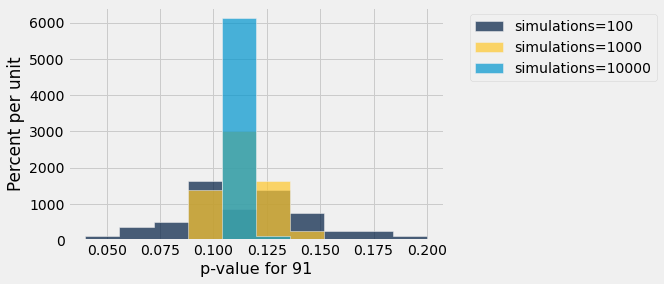

In [16]:
# For larger numbers of simulations, p-values are more consistent
tests.hist(1, group='simulations')

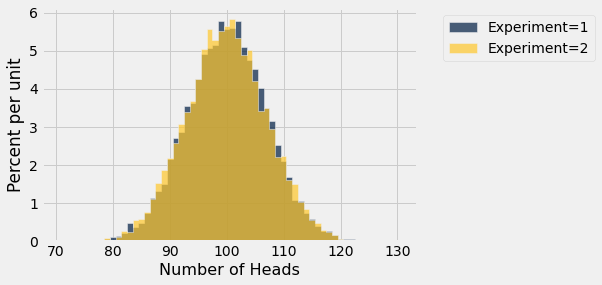

In [17]:
# Since a large number of simulations provides a good estimate of the
# theoretical distribution of the test statistic under the null hypothesis
num_sims = 10000
counts_1 = run_test(num_sims, 200)
counts_2 = run_test(num_sims, 200)
t = Table().with_columns(
    'Experiment', [1] * num_sims + [2] * num_sims,
    'Number of Heads', np.append(counts_1, counts_2))
t.hist(1, group='Experiment', bins=np.arange(70.5, 131, 1))

## Changing the size of the taste test

In [18]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
true_proportion = 0.45
true_distribution = make_array(true_proportion, 1 - true_proportion)
true_distribution

array([ 0.45,  0.55])

In [19]:
# Taste tests with 200 people will give varioius numbers of people who prefer Super Soda
sample_size = 200
sample_proportions(sample_size, true_distribution) * sample_size

array([  88.,  112.])

In [20]:
# If you run a taste test for 200 people, what might you conclude?
def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = make_array(true_proportion, 1 - true_proportion)
    taste_test_results = sample_proportions(sample_size, true_distribution) * sample_size
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    counts = run_test(num_simulations, sample_size)
    p_value = np.count_nonzero(counts <= observed_stat_from_this_sample) / len(counts)
    return p_value

run_experiment(10000, 200, 0.45)

0.5786

Percent that correctly reject the null 32.0


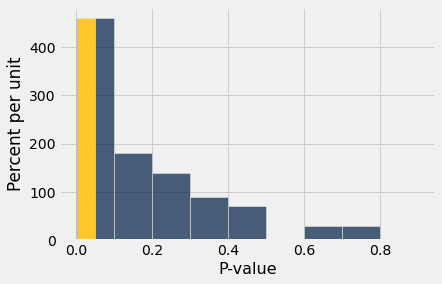

In [21]:
# Let's imagine running our taste test over and over again to see how often we reject the null
true_proportion = 0.45
sample_size = 200
p_values = make_array()
for k in np.arange(100):
    p_value = run_experiment(1000, sample_size, true_proportion)
    p_values = np.append(p_values, p_value)
Table().with_column('P-value', p_values).hist(0, right_end=0.05, bins=np.arange(0,1,0.1))
print("Percent that correctly reject the null", 100*np.mean(p_values <= 0.05))